In [25]:
import sqlite3

In [26]:
conn = sqlite3.connect('sample_db.sqlite')

In [27]:
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE books (
    id INTEGER PRIMARY KEY,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER
)
''')

conn.commit()

In [28]:
books_data = [
    ("To Kill a Mockingbird", "Harper Lee", 1960),
    ("1984", "George Orwell", 1949),
    ("The Great Gatsby", "F. Scott Fitzgerald", 1925)
]

cursor.executemany('''
INSERT INTO books (title, author, year_published) VALUES (?, ?, ?)
''', books_data)

conn.commit()

In [29]:
cursor.execute("SELECT * FROM books")
books = cursor.fetchall()

for book in books:
    print(book)

(1, 'To Kill a Mockingbird', 'Harper Lee', 1960)
(2, '1984', 'George Orwell', 1949)
(3, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925)


In [30]:
cursor.execute("SELECT * FROM books WHERE year_published > 1950")
recent_books = cursor.fetchall()

for book in recent_books:
    print(book)

(1, 'To Kill a Mockingbird', 'Harper Lee', 1960)


In [31]:
%pip install vanna

In [32]:
import vanna
from vanna.remote import VannaDefault

In [35]:
pip install pyodbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.7/334.7 kB 4.9 MB/s eta 0:00:00


In [43]:
vn = VannaDefault(model='new-demmo', api_key='...')
vn.connect_to_sqlite('sample_db.sqlite')


In [44]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)

Adding ddl: CREATE TABLE books (
    id INTEGER PRIMARY KEY,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER
)


In [45]:
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,73688-ddl,ddl,NaN,CREATE TABLE books (\n id INTEGER PRIMARY K...


SELECT title
FROM books
WHERE year_published = 1950;
Empty DataFrame
Columns: [title]
Index: []


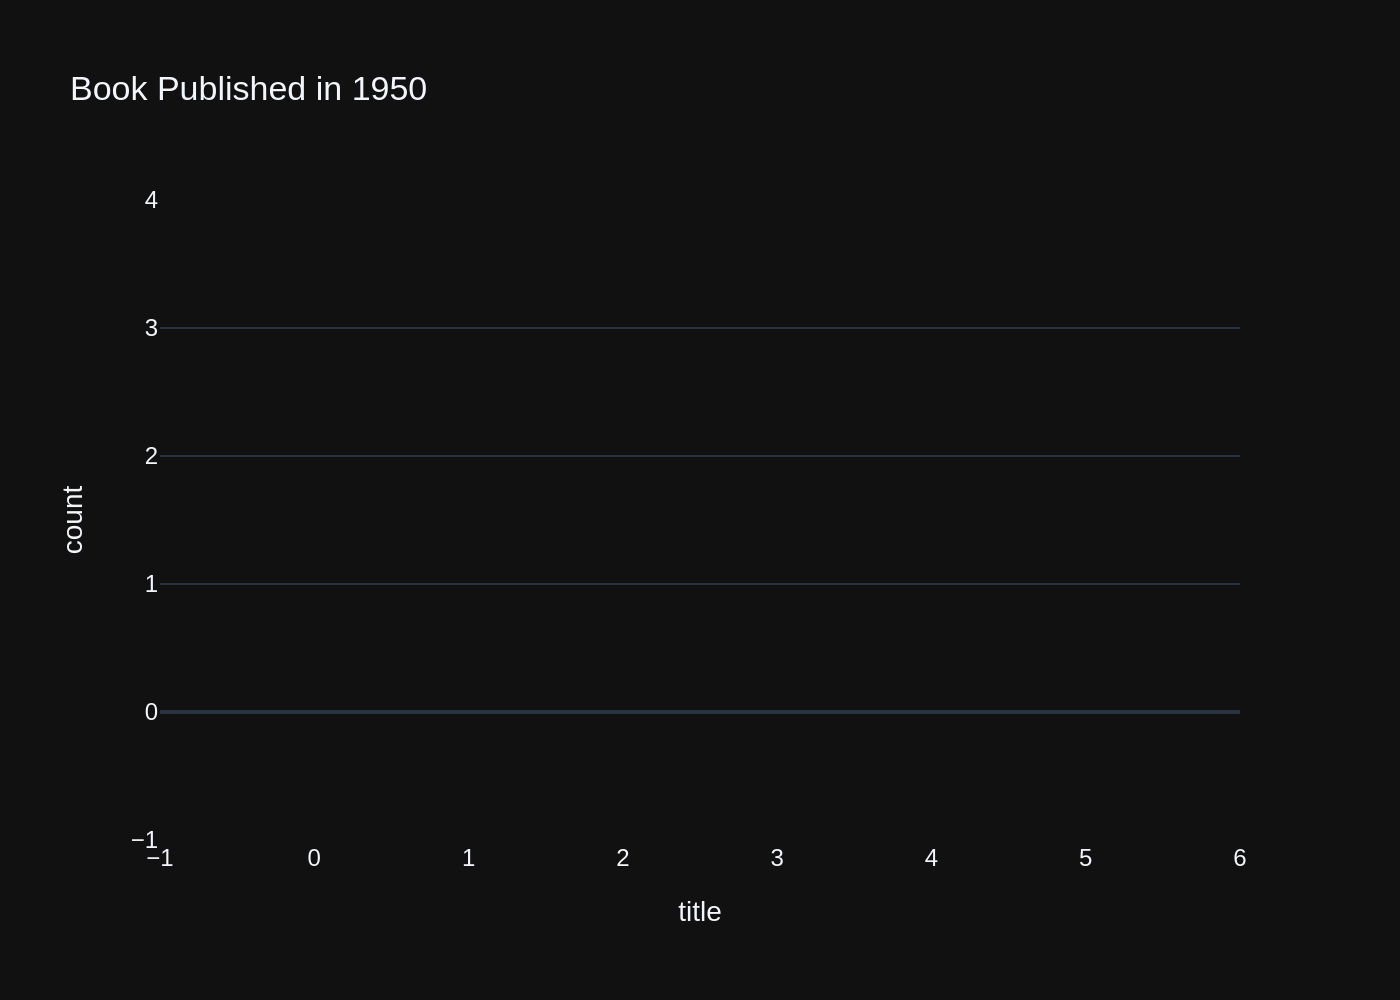

('SELECT title\nFROM books\nWHERE year_published = 1950;',
 Empty DataFrame
 Columns: [title]
 Index: [],
 None)

In [48]:
vn.ask(question="what is name of the book published in 1950?")

In [49]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

<IPython.core.display.Javascript object>

Your app is running at:
https://dcwp3esjhmq-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
